# SUPER-MART SALES ANALYTICS

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

## Task 1: Inital Data Exploration

In [2]:
df=pd.read_csv("supermarket_sales.csv")

In [3]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,NaN,68.84,6.0,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,NaN,73.56,10.0,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,NaN,36.26,2.0,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,NaN,54.84,3.0,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice ID,1003,1000,849-09-3807,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branch,1003,3,A,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1003,3,Yangon,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer type,924,2,Normal,470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1003,2,Female,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product line,960,6,Fashion accessories,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit price,996.0,NaN,NaN,NaN,55.764568,26.510165,10.08,33.125,55.42,78.085,99.96
Quantity,983.0,NaN,NaN,NaN,5.501526,2.924673,1.0,3.0,5.0,8.0,10.0
Tax 5%,1003.0,NaN,NaN,NaN,15.400368,11.715192,0.5085,5.89475,12.096,22.5395,49.65
Total,1003.0,NaN,NaN,NaN,323.407726,246.019028,10.6785,123.78975,254.016,473.3295,1042.65


In [6]:
df.shape

(1003, 17)

## Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

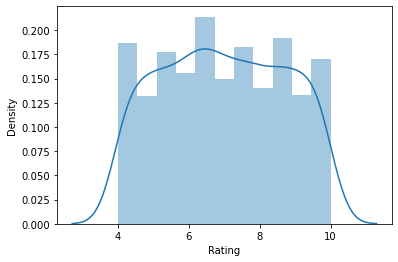

In [7]:
sns.distplot(df["Rating"]);

In [8]:
from scipy.stats import skew
print(skew(df["Rating"]))

0.009577997530100583


From the data we can say that it is little rightly skewed

**Question 2:** Do aggregate sales numbers differ by much between branches?

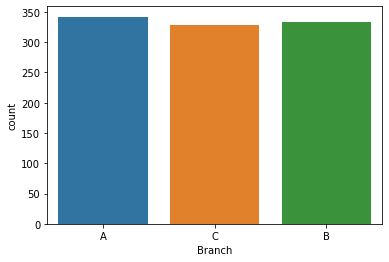

In [9]:
sns.countplot(df['Branch']);
df['Branch'].value_counts();

We can say that branch A is significantly more than other branches

## Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

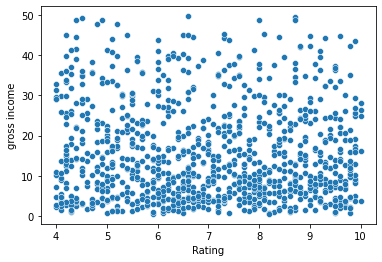

In [10]:
sns.scatterplot(df['Rating'], df['gross income']);

## Task 4: Dealing With Duplicate Rows and Missing Values

In [11]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

We can say that Customer Type ,Product Line,Unit Price,Quantity have missing values.

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

No more missing value

In [14]:
df.duplicated().sum()

1

In [15]:
df=df.drop_duplicates()

In [16]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8.0,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5.0,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10.0,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [17]:
df.duplicated().sum()

0

## Missing value and duplicate value treated